# Exploramos una pagina WEB

In [ ]:
# Importamos las librerías necesarias.
# BeautifulSoup se usa para analizar el HTML y extraer información.
# requests se usa para hacer peticiones HTTP y obtener el contenido de la página web.
from bs4 import BeautifulSoup
import requests

In [ ]:
# Definimos la URL de la página web que queremos analizar.
url = "https://es.wikipedia.org/wiki/Neurociencia"

In [ ]:
# Obtenemos el contenido de la página web usando requests.get(url).text.
# Esto nos devuelve el contenido de la página como una cadena de texto.
contenido = requests.get(url).text

In [ ]:
# Creamos un objeto BeautifulSoup a partir del contenido de la página web.
# Esto nos permite analizar el HTML y extraer la información que necesitamos.
# El segundo argumento "html.parser" especifica el parser que se usará.

soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
# Usamos el método find para encontrar el elemento title y extraer su texto.
# El elemento title contiene el título de la página web.
titulo = soup.find("title").text

# Imprimimos el título de la página web.
print(titulo)

Neurociencia - Wikipedia, la enciclopedia libre


In [ ]:
# Buscamos todas las etiquetas <h1> en el HTML.
# find_all devuelve una lista de elementos que coinciden con la etiqueta.
h1 = soup.find_all("h1")

In [ ]:
# Iteramos sobre cada elemento encontrado en la lista h1.
# Cada elemento es un objeto Tag de BeautifulSoup.
for elemento_h1 in h1:
    # Extraemos el texto dentro del elemento <h1> usando .text.
    texto_h1 = elemento_h1.text
    # Imprimimos el texto extraído.
    print(texto_h1)

Neurociencia


In [ ]:
# Importamos la clase Counter para contar la frecuencia de elementos.
from collections import Counter

In [ ]:
# Obtenemos todos los párrafos de la página y los convertimos a una sola cadena de texto.
parrafos = str(soup.find_all("p"))

In [ ]:
# Contamos la frecuencia de la palabra
print(parrafos.count("Neurociencia"))
print(parrafos.count("cerebro"))
print(parrafos.count("celula"))

4
12
6


In [ ]:
# Funcion para buscar palabras
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la plabra '{palabra}' {ocurrencias} veces")

In [ ]:
buscar_palabra("Neurociencia")

Encontraste la plabra 'Neurociencia' 166 veces


In [ ]:
# Importamos la librería random para poder elegir elementos aleatorios.
import random

In [ ]:
parrafo = soup.find_all("p") # Obtenemos todos los párrafos de la página usando find_all.
# Elegimos un párrafo aleatorio de la lista de párrafos usando random.choice.
parrafo_aleatorio = random.choice(parrafo).text.strip()

In [ ]:
print(parrafo_aleatorio)

Es cierto que las formas espontáneas de desarrollo parecen una condición necesaria para las formas de funcionamiento cognoscitivo, pero no son condición suficiente.[7]​ Existen nomenclaturas psicopatológicas, hoy aplicadas a los niños, que puede llevar a la medicalización de la infancia.[8]​


In [ ]:
# Imprimimos la cantidad de palabras en el párrafo aleatorio.
print(len(parrafo_aleatorio.split()))

40


# Limpiamos y Graficamos

In [ ]:
from wordcloud import WordCloud # Importa la librería WordCloud para generar nubes de palabras.
import numpy as np # Importa numpy para operaciones numéricas, especialmente para trabajar con matrices.
from PIL import Image # Importa la librería PIL (Pillow) para trabajar con imágenes.
import nltk # Importa la librería NLTK para el procesamiento del lenguaje natural.
from nltk.corpus import stopwords # Importa el módulo stopwords de NLTK para obtener las palabras vacías.
import re # Importa la librería re para trabajar con expresiones regulares.
import matplotlib.pyplot as plt # Importamos la librería matplotlib para mostrar la nube de palabras.



In [ ]:
# Descarga corpus de stopwords en español
nltk.download('stopwords')
# Crea un conjunto de stopwords en español para facilitar su uso.
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Funcion para limpiar texto

def limpiar_texto(texto):

  texto_minuscula = texto.lower() # convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina todos los signos de puntuacion

  lista_palabras = texto_sin_puntuacion.split() # divide el texto en palabras individuales

  palabras_importantes = [] # crea lista de palabras importantes

  for palabra in lista_palabras:
    if palabra not in stopwords_es:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [ ]:
# Obtenemos todo el texto del HTML usando get_text() y lo guardamos en texto_completo.
texto_completo = soup.get_text()

# Limpiamos el texto completo usando la función limpiar_texto() y guardamos las palabras limpias en palabras_limpias.
palabras_limpias = limpiar_texto(texto_completo)

# Unimos las palabras limpias en una sola cadena de texto, separadas por espacios, y guardamos el resultado en texto_limpio.
texto_limpio = ' '.join(palabras_limpias)

In [ ]:
# Define una lista de colores personalizados para la nube de palabras (en este caso, tonos violetas).
colores_personalizados = ['#EE82EE', '#9932CC', '#DA70D6']

# Crea un objeto WordCloud con configuraciones específicas.
wordcloud = WordCloud(
    width=800,  # Ancho de la imagen de la nube de palabras.
    height=400,  # Alto de la imagen de la nube de palabras.
    background_color='white',  # Color de fondo de la imagen.
    color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: random.choice(colores_personalizados)  # Función para elegir colores aleatorios de la lista 'colores_personalizados'.
).generate(texto_limpio)  # Genera la nube de palabras a partir del 'texto_limpio'.

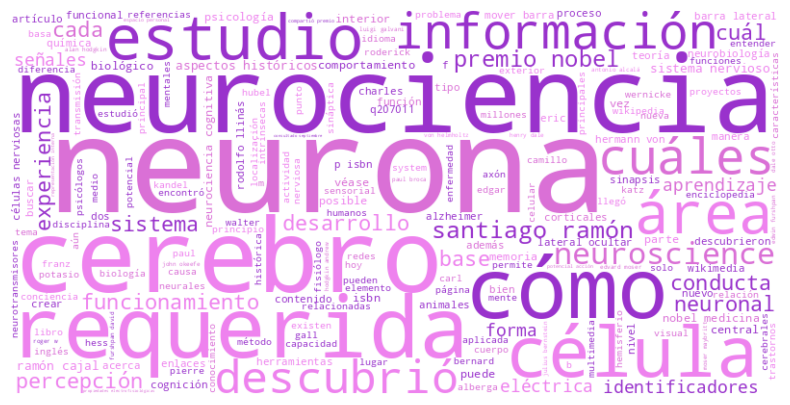

In [ ]:
plt.figure(figsize=(10, 5))  # Creamos una figura para la nube de palabras con tamaño 10x5 pulgadas.
plt.imshow(wordcloud, interpolation='bilinear')  # Mostramos la nube de palabras usando imshow con interpolación bilinear.
plt.axis('off')  # Ocultamos los ejes de la figura.
plt.show()  # Mostramos la figura con la nube de palabras.

# Spacy

In [5]:
# Documentacion de Spacy -- https://spacy.io/api/doc

!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 859.3 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
# Importamos libreria Spacy ( Libreria que contiene funciones avanzadas para el procesamiento del lenguaje natural (PLN) en grandes volúmenes de texto a alta velocidad .)
# De la libreria Spacy utilizamos DISPLACY (facilitador)

import spacy
from spacy import displacy
#Vuelvo a importar la libreria porque no funciana el codigo.
from bs4 import BeautifulSoup # Importamos BeautifulSoup para analizar el HTML.
import requests

In [9]:
# PIPELINE DE SPACY (proceso automatizado usando una serie de operaciones a un texto para analizarlo )

# Cargar el modelo
nlp = spacy.load("es_core_news_lg")
import es_core_news_lg
nlp = es_core_news_lg.load()

In [10]:
url = "https://es.wikipedia.org/wiki/Neurociencia" # Definimos la URL de la página.
contenido = requests.get(url).text # Obtenemos el contenido HTML de la página.
soup = BeautifulSoup(contenido, "html.parser") # Creamos un objeto BeautifulSoup para analizar el HTML.


In [12]:
texto_completo = soup.get_text()  # Extraemos todo el texto de la página web usando get_text().

In [13]:
# Procesar el texto con el modelo de lenguaje
doc = nlp(texto_completo)  # doc es un objeto Doc de spacy que contiene la información lingüística


In [18]:
# Tokenizamos el texto
tokens = [token.text for token in doc]

# Imprimimos los tokens
print(tokens)

['\n\n\n\n', 'Neurociencia', '-', 'Wikipedia', ',', 'la', 'enciclopedia', 'libre', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Ir', 'al', 'contenido', '\n\n\n\n\n\n\n\n', 'Menú', 'principal', '\n\n\n\n\n\n', 'Menú', 'principal', '\n', 'mover', 'a', 'la', 'barra', 'lateral', '\n', 'ocultar', '\n\n\n\n\t\t', 'Navegación', '\n\t\n\n\n', 'PortadaPortal', 'de', 'la', 'comunidadActualidadCambios', 'recientesPáginas', 'nuevasPágina', 'aleatoriaAyudaNotificar', 'un', 'errorPáginas', 'especiales', '\n\n\n\n\n\n\t\t', 'specialpages-url|specialpages', '\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Buscar', '\n\n\n\n\n\n\n\n\n\n\n\n', 'Buscar', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Apariencia', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Donaciones', '\n\n', 'Crear', 'una', 'cuenta', '\n\n', 'Acceder', '\n\n\n\n\n\n\n\n\n', 'Herramientas', 'personales', '\n\n\n\n\n\n', 'Donaciones', 'Crear', 'una', 'cuenta', 'Acceder', '\n\n\n\n\n\n\t\t', 'Páginas

In [24]:
# Lematizacion: forma base de cada token
for token in doc:
    # Ignoramos puntuación y espacios para mayor claridad
    if not token.is_punct and not token.is_space:
        print(f"'{token.text}' -> '{token.lemma_}'")

'Neurociencia' -> 'Neurociencia'
'Wikipedia' -> 'Wikipedia'
'la' -> 'el'
'enciclopedia' -> 'enciclopedia'
'libre' -> 'libre'
'Ir' -> 'Ir'
'al' -> 'al'
'contenido' -> 'contenido'
'Menú' -> 'Menú'
'principal' -> 'principal'
'Menú' -> 'Menú'
'principal' -> 'principal'
'mover' -> 'mover'
'a' -> 'a'
'la' -> 'el'
'barra' -> 'barra'
'lateral' -> 'lateral'
'ocultar' -> 'ocultar'
'Navegación' -> 'Navegación'
'PortadaPortal' -> 'PortadaPortal'
'de' -> 'de'
'la' -> 'el'
'comunidadActualidadCambios' -> 'comunidadActualidadCambios'
'recientesPáginas' -> 'recientesPáginas'
'nuevasPágina' -> 'nuevasPágina'
'aleatoriaAyudaNotificar' -> 'aleatoriaayudanotificar'
'un' -> 'uno'
'errorPáginas' -> 'errorpágina'
'especiales' -> 'especial'
'specialpages-url|specialpages' -> 'specialpages-url|specialpages'
'Buscar' -> 'buscar'
'Buscar' -> 'buscar'
'Apariencia' -> 'Apariencia'
'Donaciones' -> 'Donaciones'
'Crear' -> 'crear'
'una' -> 'uno'
'cuenta' -> 'cuenta'
'Acceder' -> 'acceder'
'Herramientas' -> 'Herramien

In [26]:
# Etiquetado gramatical:
# Recorremos cada palabra (token) en el texto
for token in doc:
    # Si el token no es un espacio en blanco:
    if not token.is_space:
        # Imprimimos:
        # - La palabra original
        # - Su etiqueta gramatical principal (POS tag)
        # - Una explicación de la etiqueta POS
        # - Su etiqueta gramatical detallada
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'Neurociencia' -> PROPN (proper noun) -> PROPN
'-' -> PUNCT (punctuation) -> PUNCT
'Wikipedia' -> PROPN (proper noun) -> PROPN
',' -> PUNCT (punctuation) -> PUNCT
'la' -> DET (determiner) -> DET
'enciclopedia' -> NOUN (noun) -> NOUN
'libre' -> ADJ (adjective) -> ADJ
'Ir' -> PROPN (proper noun) -> PROPN
'al' -> ADP (adposition) -> ADP
'contenido' -> NOUN (noun) -> NOUN
'Menú' -> PROPN (proper noun) -> PROPN
'principal' -> ADJ (adjective) -> ADJ
'Menú' -> PROPN (proper noun) -> PROPN
'principal' -> ADJ (adjective) -> ADJ
'mover' -> VERB (verb) -> VERB
'a' -> ADP (adposition) -> ADP
'la' -> DET (determiner) -> DET
'barra' -> NOUN (noun) -> NOUN
'lateral' -> ADJ (adjective) -> ADJ
'ocultar' -> VERB (verb) -> VERB
'Navegación' -> PROPN (proper noun) -> PROPN
'PortadaPortal' -> PROPN (proper noun) -> PROPN
'de' -> ADP (adposition) -> ADP
'la' -> DET (determiner) -> DET
'comunidadActualidadCambios' -> PROPN (proper noun) -> PROPN
'recientesPáginas' -> PROPN (proper noun) -> PROPN
'nuevasPágin

In [27]:
# Analisis de dependencia sintactica
for token in doc:
    # Si el token no es un espacio en blanco:
    if not token.is_space:
        # Imprimimos:
        # - La palabra original
        # - Su relación de dependencia (dep_)
        # - Una explicación de la relación de dependencia
        # - La palabra principal a la que está conectada (head.text)
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'Neurociencia' -> ROOT (root) -> 'Neurociencia'
'-' -> punct (punctuation) -> 'Wikipedia'
'Wikipedia' -> appos (appositional modifier) -> 'Neurociencia'
',' -> punct (punctuation) -> 'enciclopedia'
'la' -> det (determiner) -> 'enciclopedia'
'enciclopedia' -> dep (unclassified dependent) -> 'Neurociencia'
'libre' -> amod (adjectival modifier) -> 'enciclopedia'
'Ir' -> nmod (modifier of nominal) -> 'enciclopedia'
'al' -> case (case marking) -> 'contenido'
'contenido' -> nmod (modifier of nominal) -> 'enciclopedia'
'Menú' -> appos (appositional modifier) -> 'contenido'
'principal' -> amod (adjectival modifier) -> 'Menú'
'Menú' -> appos (appositional modifier) -> 'contenido'
'principal' -> amod (adjectival modifier) -> 'Menú'
'mover' -> advcl (adverbial clause modifier) -> 'Buscar'
'a' -> case (case marking) -> 'barra'
'la' -> det (determiner) -> 'barra'
'barra' -> obj (object) -> 'mover'
'lateral' -> amod (adjectival modifier) -> 'barra'
'ocultar' -> xcomp (open clausal complement) -> 'mo

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pass' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [31]:
# Visualizamos el análisis de dependencias del texto procesado (doc)

displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

In [32]:
# Buscamos y mostramos entidades nombradas
if doc.ents:  # Si se encontraron entidades en el documento
    print("Entidades encontradas:")
    print("Texto de la Entidad -> Etiqueta (Tipo)")
    for ent in doc.ents:  # Recorremos cada entidad
        print(f"'{ent.text}' -> {ent.label_} ({spacy.explain(ent.label_)})")
else:  # Si no se encontraron entidades
    print("No se encontraron entidades nombradas en este texto.")

Entidades encontradas:
Texto de la Entidad -> Etiqueta (Tipo)
'Neurociencia' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Wikipedia' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'la enciclopedia libre





































Ir' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Menú' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Menú' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Navegación
	


PortadaPortal' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'comunidadActualidadCambios' -> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
'Buscar











Buscar






















Apariencia' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Acceder








Herramientas' -> MISC (Miscellaneous entities, e.g. 

In [34]:
# Visualizamos las entidades nombradas en el texto

displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

In [36]:
 # Importamos la clase Counter para contar la frecuencia de elementos.
from collections import Counter

In [39]:
# Extrae el texto del elemento 'body' (o el elemento que contenga el texto principal)
wiki_txt = soup.find("body").get_text()

# Imprime el texto
#print(wiki_txt)

In [41]:
# Extraemos una muestra de 200 caracteres del texto
muestra = wiki_txt[:200]

# Imprimimos la muestra con formato
print(f"'{muestra}...'")

'Ir al contenido







Menú principal





Menú principal
mover a la barra lateral
ocultar



		Navegación
	


PortadaPortal de la comunidadActualidadCambios recientesPáginas nuevasPágina aleatoriaAyu...'


In [50]:
# Procesamos el texto con el modelo de lenguaje de spaCy
doc = nlp(wiki_txt)

# Imprimimos un mensaje para indicar que el procesamiento ha finalizado
print("¡Texto procesado!")

¡Texto procesado!


# Palabras mas comunes

In [51]:
# Creamos una lista vacía llamada "palabras_clave" para almacenar las palabras clave que se extraigan del texto.
palabras_clave = []

In [61]:
# Recorremos cada token (palabra) en el documento procesado por spaCy (doc)
for token in doc:
    # Si el token es alfabético (no contiene números o signos de puntuación) y no es una stop word:
    if token.is_alpha and not token.is_stop:
        # Normalización: Obtener lema y convertir a minúsculas
        # - token.lemma_: Obtiene la forma base de la palabra (lema).
        # - .lower(): Convierte la palabra a minúsculas.
        palabras_clave.append(token.lemma_.lower())  # Agregamos la palabra clave a la lista

# Imprimimos la cantidad de palabras clave extraídas
print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")

# Mostramos un ejemplo de las primeras 15 palabras clave extraídas
print(f"Ejemplo: {palabras_clave[:15]}")  # Usamos slicing para obtener las primeras 15 palabras

Se extrajeron 1923 palabras clave (lemas, sin stop words).
Ejemplo: ['contenido', 'menú', 'principal', 'menú', 'principal', 'mover', 'barra', 'lateral', 'ocultar', 'navegación', 'portadaportal', 'comunidadactualidadcambios', 'recientespáginas', 'nuevaspágina', 'aleatoriaayudanotificar']


In [62]:
# Usamos Counter para contar la frecuencia de cada palabra clave en la lista palabras_clave.
frecuencia_palabras = Counter(palabras_clave)

In [63]:
# Definimos la cantidad de palabras más comunes que queremos obtener (en este caso, 15).
N = 15

# Obtenemos las N palabras más comunes usando el método most_common() de Counter.
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [64]:
# Iteramos a través de la lista de palabras más comunes y sus frecuencias.
for palabras_clave, frecuencia in palabras_mas_comunes:
    # Imprimimos cada palabra y su frecuencia en un formato legible.
    print(f"- '{palabras_clave}' -> {frecuencia}")

- 'neurociencia' -> 31
- 'neurona' -> 30
- 'cerebro' -> 27
- 'requerido' -> 18
- 'célula' -> 16
- 'nervioso' -> 15
- 'descubrir' -> 13
- 'sistema' -> 12
- 'artículo' -> 10
- 'histórico' -> 9
- 'estudio' -> 9
- 'isbn' -> 9
- 'aspecto' -> 8
- 'ramón' -> 8
- 'cognitivo' -> 8
